## Diccionario de datos



- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Plan de solución

definir variables para los dataframes y usar read_csv para leerlos, luego usar el metodo info para ver los tipos de datos y asegurarme de que sean congruentes.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success"> 
<b>definir cada uno de los datasets en variables</b> <a class="tocSkip"></a>



</div>

In [2]:
orders = pd.read_csv("/datasets/instacart_orders.csv",sep=";")
products = pd.read_csv("/datasets/products.csv",sep=";")
aisles = pd.read_csv("/datasets/aisles.csv",sep=";")
departments = pd.read_csv("/datasets/departments.csv",sep=";")
order_products = pd.read_csv("/datasets/order_products.csv",sep=";")

In [3]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success"> 
<b>Use info para revisar los valores nulos de los diferentes datasets</b> <a class="tocSkip"></a>



</div>

## Conclusiones


Los archivos csv usan el separador ";", por lo que agregue el argumento sep puesto que inicialmente al usar info sobre el df que cree me devolvia una sola columna, de entrada los dtypes parecen estar bien considere que order_hour_of_day podria ser datetime pero despues de revisar las primeras filas vi que esta correcto como int.



## Plan de solución
todas las columnas de ID son numeros enteros, no se necesitara ningun cambio por ese lado, para revisar ausentes usara los metodos isna y dropna o en caso de ser necesario rellenar los ausentes usando promedio o media, y vere cual es la mejor manera de encargarme de los valores duplicados


### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())


15



Todos los elementos de la fila son identicos por lo que seguramente no sean ventas reales, ademas deberia haber un order_id unico por cada venta

In [ ]:

wednesday_filter = orders[(orders["order_dow"] == 3)&(orders["order_hour_of_day"] == 2)]
print(wednesday_filter)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   



Hubo 121 pedidos el miercoles a las 2 de la mañana

In [ ]:

orders.drop_duplicates(inplace = True)

In [ ]:

orders.duplicated().sum()


0

In [ ]:

print(orders["order_id"].duplicated().sum())

0


No habian order_id que estuviesen duplicados sin que el resto de las filas lo estuviesen tambien.

### `products` data frame

In [ ]:

products.duplicated().sum()
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:

print(products["product_id"].duplicated().sum())

0


In [ ]:

products["product_name"] = products["product_name"].str.upper()
products["product_name"].duplicated().sum()


1361

In [ ]:


productos_con_nombre = products[products['product_name'].notna()]
productos_dup_nona =productos_con_nombre["product_name"].value_counts()
products.drop_duplicates(subset=["product_name"],inplace=True)
products["product_name"].duplicated().sum()


0


Encontre multiples nombres de productos duplicados hasta 2 veces (una unica instancia de 3), aun asi no encontre product ids duplicados, decidi remover los productos duplicados ya que pueden alterar el analisis de forma significativa

### `departments` data frame

In [ ]:


departments.duplicated().sum()



0

In [ ]:

departments["department_id"].duplicated().sum()

0

No hay filas totalmente duplicadas ni department IDs duplicados, nada que modificar por el momento

### `aisles` data frame

In [ ]:

aisles.duplicated().sum()

0

In [ ]:

aisles["aisle_id"].duplicated().sum()

0


Tampoco encontra filas duplicadas ni IDs duplicados en este dataframe

### `order_products` data frame

In [ ]:

order_products.duplicated().sum()


0

In [ ]:

print(order_products["order_id"].duplicated().sum())
print(order_products["product_id"].duplicated().sum())




order_products.shape

4094961
4499434


(4545007, 4)


Una gran mayoria de "order_id" y "product_id" estan duplicados, Inicialmente los elimine y luego haciendo el analisis al final del proyecto no me daba cuenta porque no lograba sacar resultados congruentes, estos duplicados tienen razon para estar.

### `products` data frame

In [ ]:

products["product_name"].isna().sum()

1

Solo encontre un valor ausente en la columna "product_name"

In [ ]:

products[products["product_name"].isna() == True]

#Todos los ausentes estan relacionados con el pasillo ID 100

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Todos los nombres de productos ausentes están relacionados con el departamento con ID 21


In [ ]:

print(departments[departments["department_id"] == 21])
aisles[aisles["aisle_id"]==100]

    department_id department
20             21    missing


,aisle_id,aisle
99,100,missing


En ambos data frames ("departments" y "aisles") el departamento y pasillo son faltantes

In [ ]:
# Completar los nombres de productos ausentes con 'Unknown'
products["product_name"].fillna("unknown",inplace=True)
products["product_name"].isna().sum()

0

solo habia un nombre de producto ausente, asociado con el department_id 21 y aisle_id 100 

### `orders` data frame

In [ ]:

orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [ ]:


orders[(orders["days_since_prior_order"].isna() == True) & (orders["order_number"]==1)]
orders["days_since_prior_order"].fillna(0,inplace=True)

Todos los ausentes en days_since_prior_order son el primer pedido del cliente, por lo que me parece logico remplazarlos con 0

### `order_products` data frame

In [ ]:

order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [ ]:

order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [ ]:

# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_order_naid = order_products[order_products["add_to_cart_order"].isna() == True]
add_to_cart_order_naid["order_id"]

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [ ]:


# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
add_to_cart_order_naid.groupby("order_id").size()
# Contar el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
productos_por_pedido = order_products.groupby('order_id')['product_id'].count()
productos_por_pedido.min()

1



-Solo hay un registro con un valor ausente en "add_to_cart_order" lo que nos impide saber la cantidad de productos de ese registro
-De entrada viendo que no hay "product_id" duplicados se sabe que solo hay un producto por pedido, al agrupar por "order_id" y contar los products ID y sacar el minimo se confirma esto

In [ ]:
# Remplazar los valores ausentes en la columna 'add_to_cart con 999 y convertir la columna al tipo entero.
order_products["add_to_cart_order"].fillna(999,inplace = True)
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].astype("int")
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


## Conclusiones

En el transcurso del paso 2 identifique los valores ausentes y los remplaze por valores congruentes segun las instrucciones dadas, la razon de los ausentes de "days_since_prior_order" es que al no haber un pedido anterior no se registraba ninguna cifra en esta columna por lo que los remplaze por 0.

## Analisis A

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verificar que los valores sean sensibles

In [35]:

print(orders[(orders["order_hour_of_day"] >= 0)&(orders["order_hour_of_day"] <= 23)])
print(orders["order_hour_of_day"].count())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [36]:
print(orders[(orders["order_dow"] >= 0)&(orders["order_dow"] <= 6)])
print(orders["order_dow"].count())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

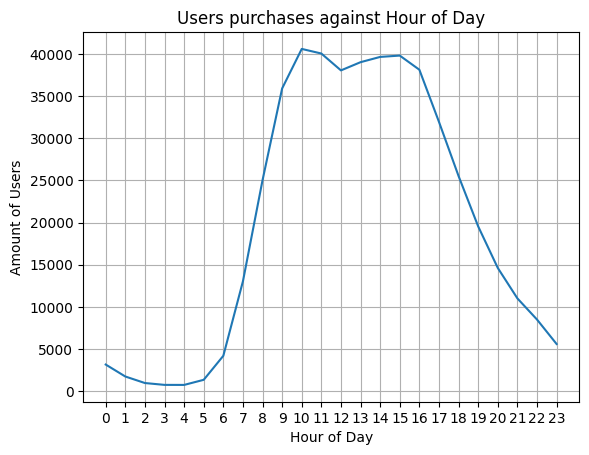

In [37]:




orders_per_hour = orders.groupby("order_hour_of_day")["user_id"].count()
orders_per_hour.plot(xlabel="Hour of Day",ylabel="Amount of Users",title="Users purchases against Hour of Day",grid=True)

plt.xticks(range(24))
plt.show()




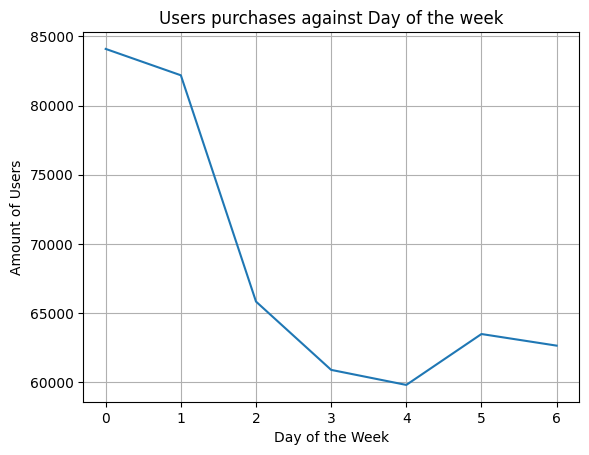

In [38]:
orders_per_day = orders.groupby("order_dow")["user_id"].count()
orders_per_day.plot(xlabel="Day of the Week",ylabel="Amount of Users",title="Users purchases against Day of the week",grid=True)
plt.xticks(range(7))
plt.show()


<AxesSubplot:title={'center':'Users purchase habits according to their purchase frequency'}, xlabel='Days since prior order', ylabel='Amount of Users'>

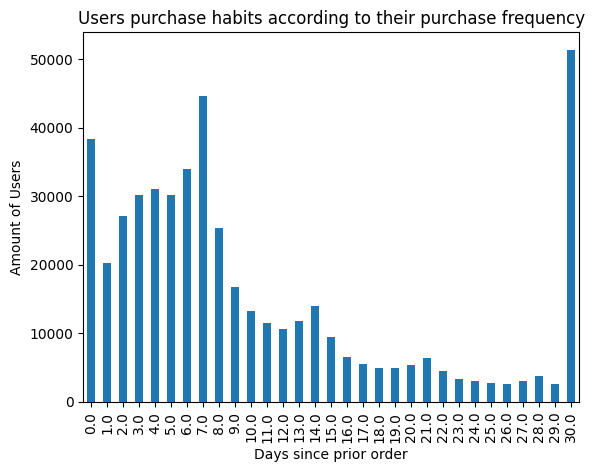

In [39]:
days_since_prior_order_group = orders.groupby("days_since_prior_order")["user_id"].count()
days_since_prior_order_group.plot(kind="bar",x="days_since_prior_order",y="user_id",xlabel="Days since prior order",ylabel="Amount of Users",title="Users purchase habits according to their purchase frequency")


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [40]:
orders_per_hour.head(24)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64

### [A3] ¿Qué día de la semana compran víveres las personas?

In [41]:
orders_per_day.sort_values(ascending=False)

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: user_id, dtype: int64

El dia domingo es el que muestra mas compras por parte de los usuarios

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [42]:
days_since_prior_order_group.sort_values(ascending=False)

days_since_prior_order
30.0    51337
7.0     44577
0.0     38406
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: user_id, dtype: int64

Lo que da ha entender la grafica es que la mayoria de los clientes hacen las compras cada 30 dias

## Analisis B 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

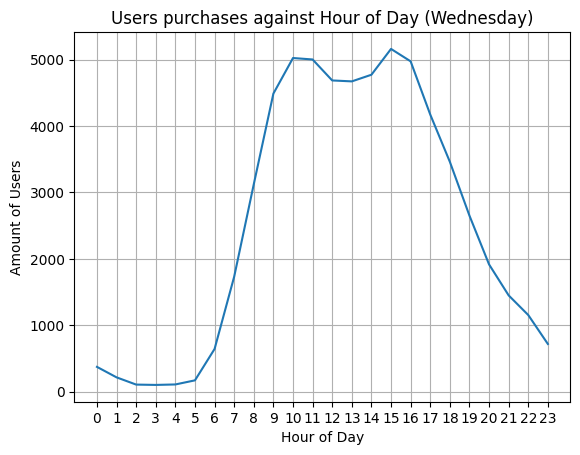

In [43]:

orders_wed = orders[orders["order_dow"] == 3]
orders_wed_hour_of_day = orders_wed.groupby("order_hour_of_day")["user_id"].count()
orders_wed_hour_of_day.plot(xlabel="Hour of Day",ylabel="Amount of Users",title="Users purchases against Hour of Day (Wednesday)",grid=True)
plt.xticks(range(24))
plt.show()


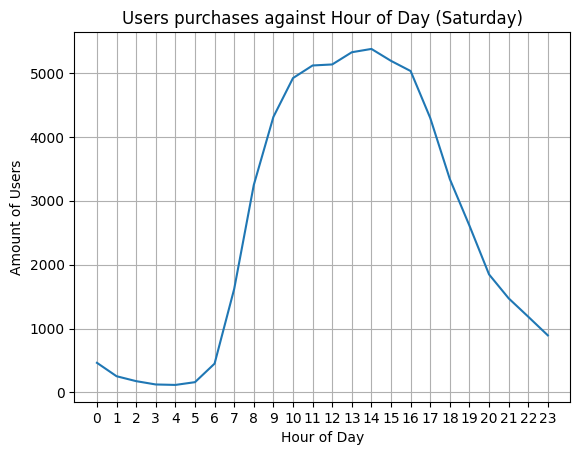

In [44]:

orders_sat = orders[orders["order_dow"] == 6]
orders_sat_hour_of_day = orders_sat.groupby("order_hour_of_day")["user_id"].count()
orders_sat_hour_of_day.plot(xlabel="Hour of Day",ylabel="Amount of Users",title="Users purchases against Hour of Day (Saturday)",grid=True)
plt.xticks(range(24))
plt.show()



Hay una ligera diferencia que se nota en el pico, el dia miercoles el pico es alrededor de las 3 de la tarde mientras que el sabado a las 2 de la tarde, ademas de que hay mas volumen entre las 10 y las 4 comparado al dia miercoles

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
distribucion_pedidos_clientes = orders.groupby("order_number")["user_id"].count()
distribucion_pedidos_clientes.sum()

478952

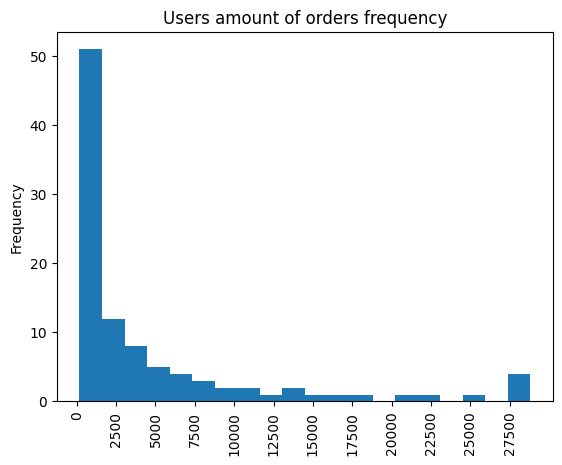

In [46]:

distribucion_pedidos_clientes.plot(kind="hist",x="order_number",y="user_id",bins=20,rot=90,xlabel="Amount of Orders",title="Users amount of orders frequency")
plt.xticks(range(0,30000,2500))
plt.show()

#La mayoria de los usuarios han realizado ordenes entre 0-1000 veces

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
merged_products_order_products = order_products.merge(products,on="product_id")
popular_products = merged_products_order_products.groupby(["product_name","product_id"])["order_id"].count()

popular_products.sort_values(ascending=False).head(20)

product_name              product_id
BANANA                    24852         66050
BAG OF ORGANIC BANANAS    13176         53297
ORGANIC STRAWBERRIES      21137         37039
ORGANIC BABY SPINACH      21903         33971
ORGANIC HASS AVOCADO      47209         29773
ORGANIC AVOCADO           47766         24689
LARGE LEMON               47626         21495
STRAWBERRIES              16797         20018
LIMES                     26209         19690
ORGANIC WHOLE MILK        27845         19600
ORGANIC RASPBERRIES       27966         19197
ORGANIC YELLOW ONION      22935         15898
ORGANIC GARLIC            24964         15292
ORGANIC ZUCCHINI          45007         14584
ORGANIC BLUEBERRIES       39275         13879
CUCUMBER KIRBY            49683         13675
ORGANIC FUJI APPLE        28204         12544
ORGANIC LEMON             5876          12232
APPLE HONEYCRISP ORGANIC  8277          11993
ORGANIC GRAPE TOMATOES    40706         11781
Name: order_id, dtype: int64

Esta parte del proyecto me costo bastante puesto que previamente elimine alrededor de 4 millones + de filas y no me daba cuenta de porque todo me daba 1 a 1, junte los datasets de order_products y products he hice una cuenta por order id, el producto mas popular son las bananas

## Analisis C 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

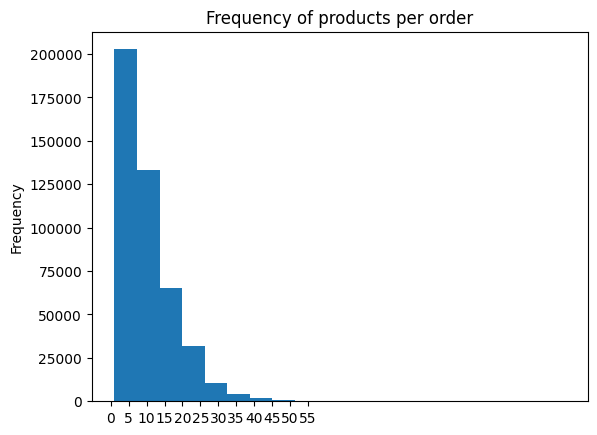

10.098983215049127


In [48]:
products_per_order = order_products.groupby("order_id")["product_id"].count()
products_per_order.plot(kind="hist",bins=20,xlabel="Products Ordered",title="Frequency of products per order")
plt.xticks(range(0,60,5))
plt.show()
print(products_per_order.mean())

El promedio de productos por orden es de 10.1 y la distribucion esta representada en la grafica

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
most_ordered = merged_products_order_products.groupby(["product_id","product_name"])["reordered"].sum()
most_ordered_top = most_ordered.sort_values(ascending=False).head(20)

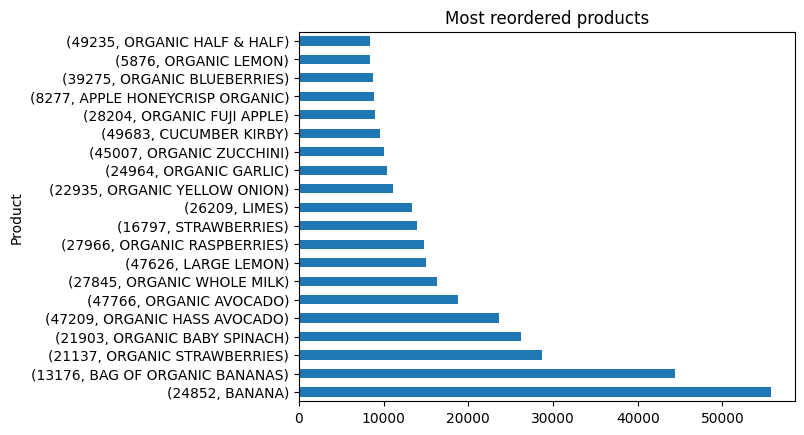

In [50]:
most_ordered_top.plot(kind="barh",x="product_name",y="reordered",xlabel="Product",title="Most reordered products")
plt.show()

Las bananas son los productos que mas se vuelven a pedir, tiene sentido teniendo en cuenta su popularidad, de hecho el orden de los productos que mas se vuelven a pedir bastante parecido al de los mas populares

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
reorder_stats = order_products.groupby('product_id')['reordered'].agg(['count', 'sum'])

In [52]:
reorder_stats["reorder_proportion"] = reorder_stats["sum"]/reorder_stats["count"]
result= reorder_stats.merge(products,on="product_id")
result["reorder_proportion"] = result["reorder_proportion"] *100
result.sort_values(by="reorder_proportion",ascending=False)

,product_id,count,sum,reorder_proportion,product_name,aisle_id,department_id
16218,18121,1,1,100.0,JALAPENOS WITH SEA SALT,107,19
24582,27387,5,5,100.0,BANANA GREEK NONFAT YOGURT,120,16
15913,17773,2,2,100.0,QUINOA- WITH OLIVE OIL,63,9
43954,49063,3,3,100.0,ROSEMARY & SEA SALT CRACKERS,78,19
13355,14935,1,1,100.0,KOMBUCHA BLUEBERRY BASIL,31,7
...,...,...,...,...,...,...,...
22487,25053,5,0,0.0,FROST ARCTIC BLITZ SPORTS DRINK,64,7
22485,25051,2,0,0.0,HERB FOR BEEF GRAVY MIX,5,13
22480,25045,13,0,0.0,BANDAGES- WATERPROOF,118,11
22479,25044,1,0,0.0,PURE PACIFIC MOUNTAIN STRAWBERRY PRESERVES,88,13


La columna reorder proportion da un porcentaje de las veces que el pedido se reordena comparado al pedido solo como tal

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

<AxesSubplot:title={'center':'Distribucion del promedio de producton que se vuelven a pedir'}, ylabel='Frequency'>

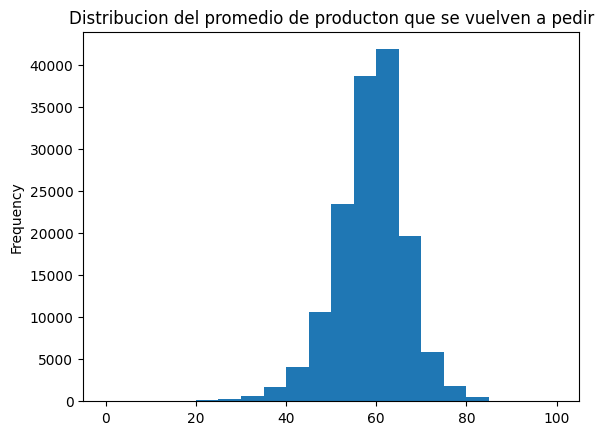

In [62]:
client_merge = orders.merge(order_products,on="order_id")
final_client_merge = client_merge.merge(result,on="product_id")
final_result = final_client_merge.groupby("user_id")["reorder_proportion"].mean()
final_result.plot(kind="hist",bins=20,title="Distribucion del promedio de producton que se vuelven a pedir")


Los clientes acostumbran a reordenar el 60% de su carrito en promedio

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [70]:
primer_articulo_carrito = merged_products_order_products[merged_products_order_products['add_to_cart_order']==1]
top_primer_articulo_carrito = primer_articulo_carrito.groupby("product_name")["add_to_cart_order"].sum()
top_primer_articulo_carrito.sort_values(ascending=False).head(20)

product_name
BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
RASPBERRIES                     1246
Name: add_to_cart_order, dtype: int64

Las bananas son el producto que los clientes tienden a poner en su carrito de primero mas seguido, de hecho nuevamente la lista es bastante parecida a la de productos mas populares al igual que en el analisis de productos que se vuelven a pedir

### Conclusion general del proyecto:


Despues de completar analisis usando las diferentes tablas que proporciona el dataset pude llegar a conclusiones como:
-las bananas son el producto mas popular y el que mas se reordena y pone de primero en la canasta
-La gran mayoria de las ordenes tienden a tener 10 productos en promedio
-La mayoria deusuarios piden cada 30 dias (seguramente hacen mercado para el mes) seguido de cada 7 dias (usuarios que hacen mercado semanal)
-Una gran mayoria de los usuarios han hecho entre 0 y 1000 ordenes usando la aplicacion
-El dia domingo es donde mas pedidos se reciben en la aplicacion
-El pico de pedidos en general es entre la 10 am y las 3 pm
